In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [2]:
from data_load import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries

In [3]:
# define sql query
query = 'SELECT * FROM xdr_data;'

# load data using psycopg2
df = load_data_from_postgres(query)

# display the first few rows of the data
if df is None:
    print('No data loaded')
else:
    print(df.head())

d:\10x\TellCo-Customer-Segmentation-and-Profitability\scripts\data_load.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [4]:
# define sql query
query = 'SELECT * FROM xdr_data;'

# load data using sqlalchemy
df = load_data_using_sqlalchemy(query)

# display the first few rows of the data
if df is None:
    print('No data loaded')
else:
    print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
print(df.describe())

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

In [6]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

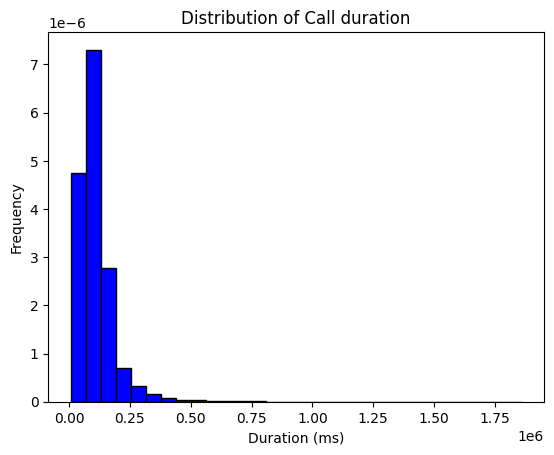

In [7]:
from visualizer import plot_histogram

# plot histogram
#plot_histogram(data, column, bins, title, xlabel, ylabel, color)
plot_histogram(df, 'Dur. (ms)', 30,'Distribution of Call duration', 'Duration (ms)', 'Frequency', 'blue',kde=True)

In [8]:
# average duration by last location name
avg_duration_by_location = df.groupby('Last Location Name')['Dur. (ms)'].mean().reset_index()
print(avg_duration_by_location.sort_values('Dur. (ms)', ascending=False))

         Last Location Name  Dur. (ms)
33951               T53539A  1177517.0
1342   CELL_208_20_520166_7  1134225.0
6056                D20985B  1038128.0
17025               D94074C  1010097.0
37089               T76656C   985972.0
...                     ...        ...
20518               G92776B     7327.0
18917               G52206C     7326.0
20510               G92604C     7267.0
18612               G30104B     7258.0
18635               G30532C     7146.0

[45547 rows x 2 columns]


Top 10 Handsets

In [12]:
# Group by handset type and count occurrences
top_handsets = df.groupby('Handset Type')['Handset Type'].count().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 Handsets:")
print(top_handsets)


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


Top 3 Handset Manufacturers

In [15]:
# Group by manufacturer and count occurrences
top_manufacturers = df.groupby('Handset Manufacturer')['Handset Manufacturer'].count().sort_values(ascending=False).head(3)

# Display the result
print("Top 3 Manufacturers:")
print(top_manufacturers)


Top 3 Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


Top 5 Handsets per Top 3 Manufacturers

In [16]:
# Filter the data to include only top 3 manufacturers
top_manufacturers_list = top_manufacturers.index.tolist()
filtered_data = df[df['Handset Manufacturer'].isin(top_manufacturers_list)]

# Get top 5 handsets per manufacturer
top_5_handsets_per_manufacturer = filtered_data.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type']\
    .count().sort_values(ascending=False).groupby('Handset Manufacturer').head(5)

# Display the result
print("Top 5 Handsets per Top 3 Manufacturers:")
print(top_5_handsets_per_manufacturer)


Top 5 Handsets per Top 3 Manufacturers:
Handset Manufacturer  Handset Type                  
Huawei                Huawei B528S-23A                  19752
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Huawei                Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018   

## Interpretation and Recommendations

---

### Interpretation:
1. **Top 10 Handsets**:
   - The Huawei B528S-23A is the most used handset with 19,752 users, indicating its popularity.
   - Apple dominates the top 10 list, with 7 out of 10 spots.
   - Samsung Galaxy S8 (Sm-G950F) is the only Samsung handset in the top 10, showcasing its user base.

2. **Top 3 Manufacturers**:
   - Apple leads with a total of 59,565 handsets, significantly outpacing Samsung and Huawei.
   - Samsung and Huawei are also strong players, with 40,839 and 34,423 handsets, respectively.

3. **Top 5 Handsets per Top 3 Manufacturers**:
   - Apple:
     - iPhone 6S (A1688), iPhone 6 (A1586), and iPhone 7 (A1778) dominate the list, reflecting sustained demand for slightly older models.
   - Samsung:
     - The Galaxy S8 is the most popular Samsung device, followed by a mix of mid-range (Galaxy A5) and entry-level (Galaxy J5, J3) devices.
   - Huawei:
     - The B528S-23A dominates, with the P20 Lite and P20 indicating interest in premium models.

---

### Recommendations for Marketing Teams:
1. **Focus on Popular Models**:
   - Invest in targeted promotions for the top handsets (e.g., Huawei B528S-23A, Apple iPhone 6S, and Samsung Galaxy S8).
   - Highlight the affordability and features of mid-range models to attract more users.

2. **Partnership Opportunities**:
   - Partner with Apple to offer exclusive deals on older but popular models like the iPhone 6 and 6S to appeal to budget-conscious users.
   - Collaborate with Huawei to promote flagship models like the P20 series.

3. **Customer Retention**:
   - Use handset insights to create retention campaigns, offering incentives for users to upgrade within the same manufacturer brand (e.g., iPhone SE users upgrading to iPhone Xr).

4. **Data-Driven Strategy**:
   - Regularly analyze handset usage trends to adjust marketing efforts dynamically.

---